# EDA

In [33]:
import pandas as pd

df = pd.read_csv(
    "maestro-v3.0.0.csv",
    encoding="utf-8",     # o "latin-1" si da error
    sep=",",              # cambia a ";" si tu CSV viene con punto y coma
    low_memory=False
)

print(df.head())

   canonical_composer                canonical_title       split  year  \
0          Alban Berg                   Sonata Op. 1       train  2018   
1          Alban Berg                   Sonata Op. 1       train  2008   
2          Alban Berg                   Sonata Op. 1       train  2017   
3  Alexander Scriabin  24 Preludes Op. 11, No. 13-24       train  2004   
4  Alexander Scriabin               3 Etudes, Op. 65  validation  2006   

                                       midi_filename  \
0  2018/MIDI-Unprocessed_Chamber3_MID--AUDIO_10_R...   
1  2008/MIDI-Unprocessed_03_R2_2008_01-03_ORIG_MI...   
2  2017/MIDI-Unprocessed_066_PIANO066_MID--AUDIO-...   
3  2004/MIDI-Unprocessed_XP_21_R1_2004_01_ORIG_MI...   
4  2006/MIDI-Unprocessed_17_R1_2006_01-06_ORIG_MI...   

                                      audio_filename    duration  
0  2018/MIDI-Unprocessed_Chamber3_MID--AUDIO_10_R...  698.661160  
1  2008/MIDI-Unprocessed_03_R2_2008_01-03_ORIG_MI...  759.518471  
2  2017/MIDI-Unpr

✅ Gráfica guardada como 'correlacion_autor_duracion.png'


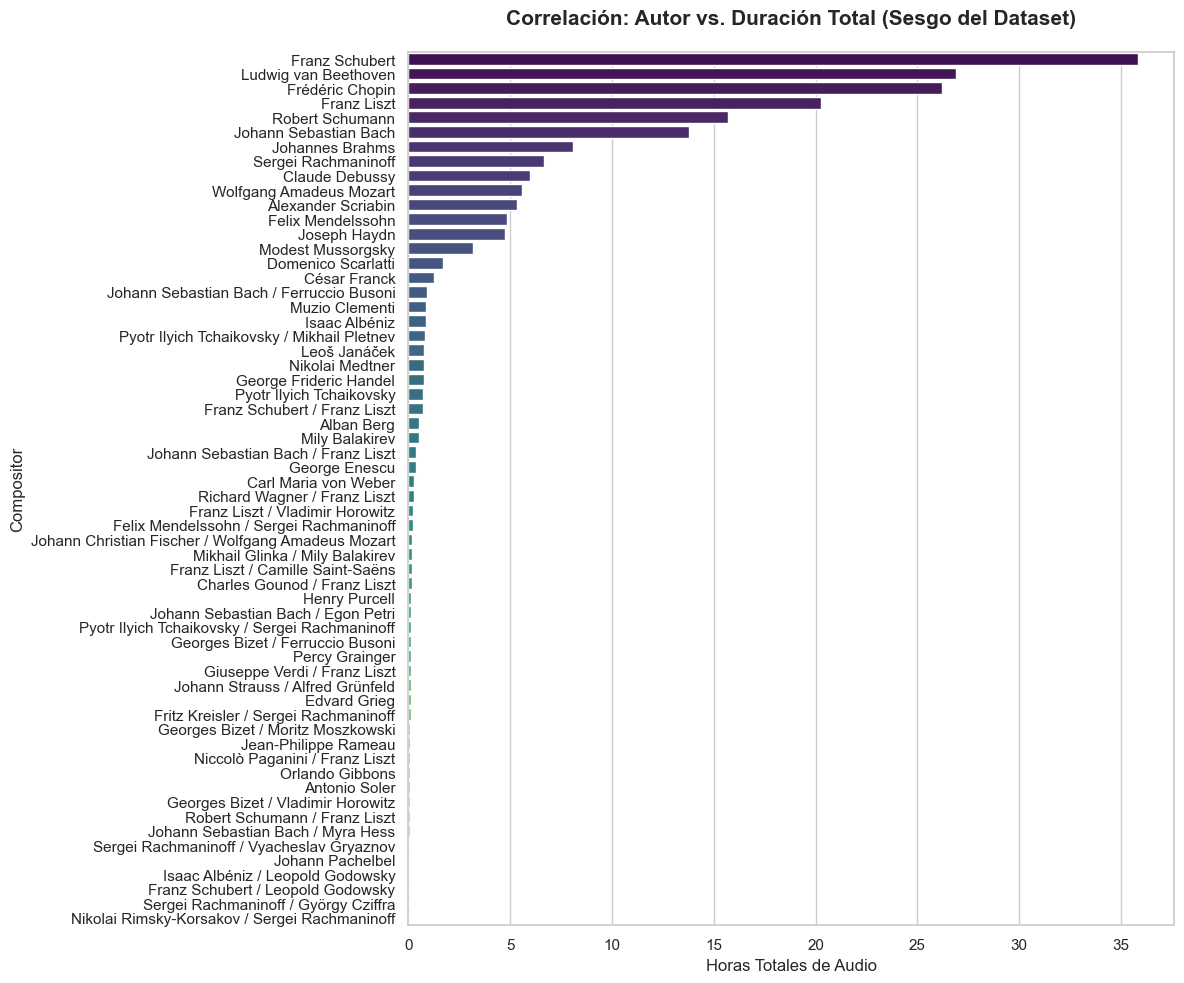

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

def visualizar_correlacion_autor_duracion():
    # 1. Cargar el dataset
    try:
        df = pd.read_csv('maestro-v3.0.0.csv')
    except FileNotFoundError:
        print("❌ Error: No se encuentra el archivo 'maestro-v3.0.0.csv'")
        return

    # 2. Procesar los datos
    # Agrupamos por compositor y sumamos la duración total de sus obras
    stats = df.groupby('canonical_composer')['duration'].sum().reset_index()
    
    # Convertimos segundos a horas para que la gráfica sea legible
    stats['duration_hours'] = stats['duration'] / 3600
    
    # Ordenamos de mayor a menor duración para ver el ranking claramente
    stats = stats.sort_values('duration_hours', ascending=False)

    # 3. Configurar la Gráfica
    sns.set_theme(style="whitegrid") # Estilo limpio con rejilla
    plt.figure(figsize=(12, 10))     # Tamaño grande para que quepan los nombres

    # Crear el gráfico de barras
    sns.barplot(
        data=stats,
        y='canonical_composer',
        x='duration_hours',
        palette='viridis',      # Mapa de color profesional (azul a amarillo)
        hue='canonical_composer',
        dodge=False,
        legend=False
    )

    # 4. Etiquetas y Títulos
    plt.title('Correlación: Autor vs. Duración Total (Sesgo del Dataset)', 
              fontsize=15, fontweight='bold', pad=20)
    plt.xlabel('Horas Totales de Audio', fontsize=12)
    plt.ylabel('Compositor', fontsize=12)
    
    # Ajustar márgenes para que no se corten los nombres
    plt.tight_layout()
    
    # Mostrar y Guardar
    plt.savefig('correlacion_autor_duracion.png', dpi=300)
    print("✅ Gráfica guardada como 'correlacion_autor_duracion.png'")
    plt.show()

if __name__ == '__main__':
    visualizar_correlacion_autor_duracion()

✅ Gráfica guardada como 'analisis_outliers_duracion.png'


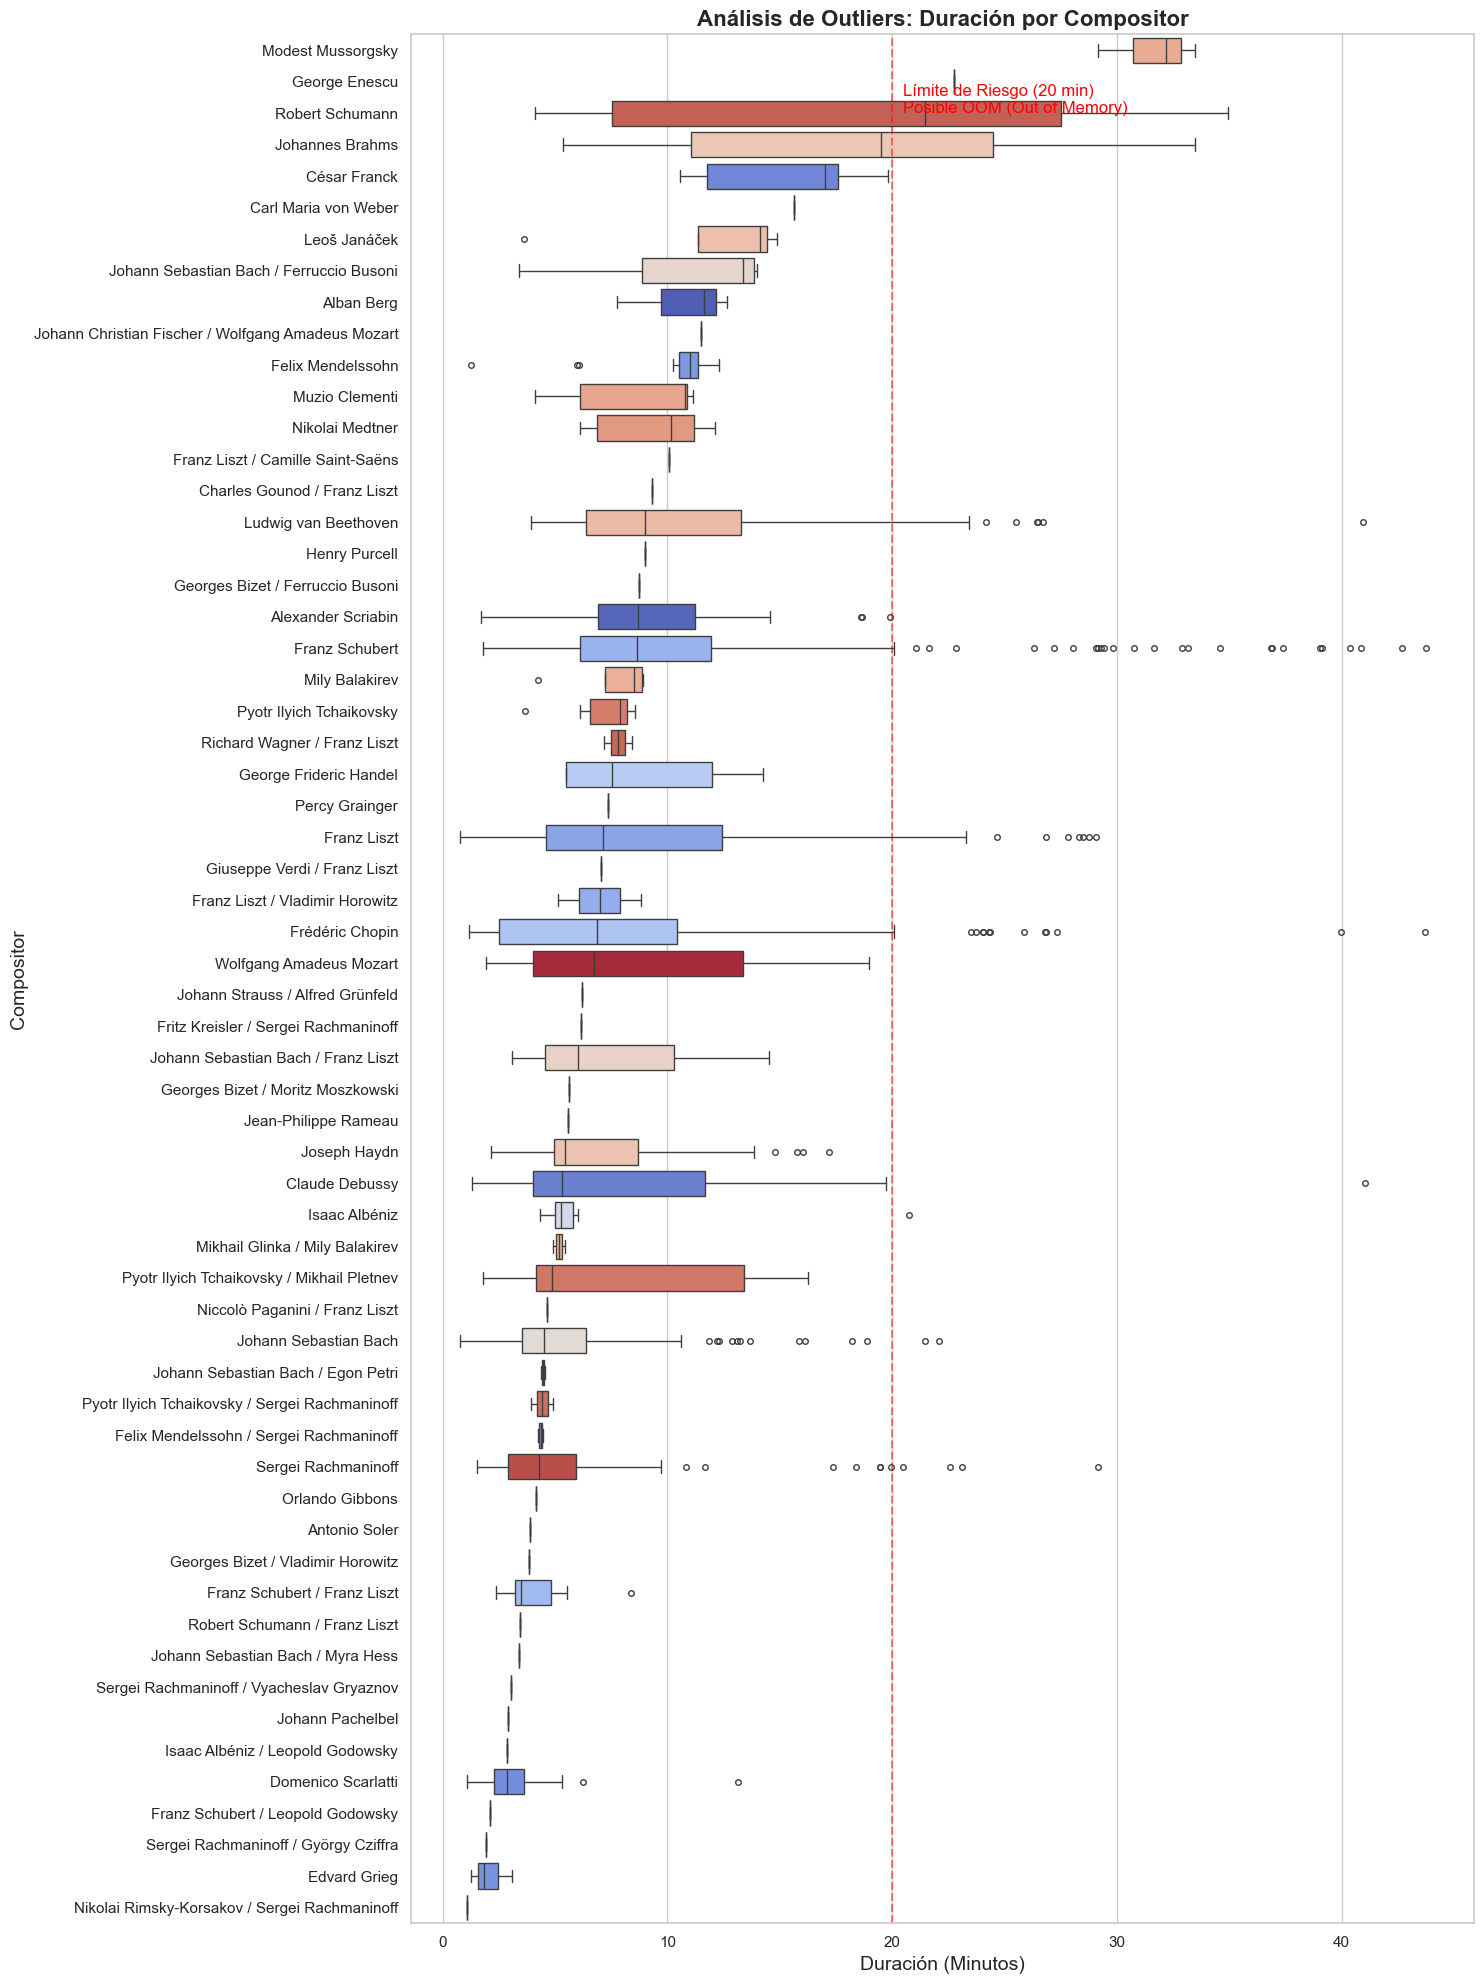

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def visualizar_outliers_duracion():
    # 1. Cargar el dataset
    try:
        df = pd.read_csv('maestro-v3.0.0.csv')
    except FileNotFoundError:
        print("❌ Error: No se encuentra el archivo 'maestro-v3.0.0.csv'")
        return

    # 2. Preprocesar: Convertir segundos a minutos
    df['duration_min'] = df['duration'] / 60

    # 3. Configurar el gráfico
    plt.figure(figsize=(15, 20)) # Alto grande para que quepan todos los nombres
    sns.set_theme(style="whitegrid")

    # 4. Ordenar: Lo más inteligente es ordenar por la mediana de duración
    # Así vemos arriba los compositores de obras largas y abajo los de cortas
    order = df.groupby('canonical_composer')['duration_min'].median().sort_values(ascending=False).index

    # 5. Crear el Boxplot
    # El Boxplot es el estándar para outliers:
    # - Caja: Rango Intercuartílico (IQR) - donde está el 50% de los datos
    # - Línea central: Mediana
    # - Bigotes: 1.5 veces el IQR
    # - Puntos (Diamantes): Outliers (Valores atípicos)
    sns.boxplot(
        data=df,
        x='duration_min',
        y='canonical_composer',
        order=order,
        palette='coolwarm',
        hue='canonical_composer',
        dodge=False,
        fliersize=4 # Tamaño de los puntos de outlier
    )
    plt.legend([],[], frameon=False) # Limpiar leyenda

    # 6. Anotaciones de Ingeniero
    plt.title('Análisis de Outliers: Duración por Compositor', fontsize=16, fontweight='bold')
    plt.xlabel('Duración (Minutos)', fontsize=14)
    plt.ylabel('Compositor', fontsize=14)

    # Marcamos una línea de seguridad
    plt.axvline(x=20, color='red', linestyle='--', alpha=0.5)
    plt.text(20.5, 2, 'Límite de Riesgo (20 min)\nPosible OOM (Out of Memory)', color='red', fontsize=12)

    plt.tight_layout()
    plt.savefig('analisis_outliers_duracion.png', dpi=300)
    print("✅ Gráfica guardada como 'analisis_outliers_duracion.png'")
    plt.show()

if __name__ == '__main__':
    visualizar_outliers_duracion()

In [36]:
df.head()

,canonical_composer,canonical_title,split,year,midi_filename,audio_filename,duration
0,Alban Berg,Sonata Op. 1,train,2018,2018/MIDI-Unprocessed_Chamber3_MID--AUDIO_10_R...,2018/MIDI-Unprocessed_Chamber3_MID--AUDIO_10_R...,698.661160
1,Alban Berg,Sonata Op. 1,train,2008,2008/MIDI-Unprocessed_03_R2_2008_01-03_ORIG_MI...,2008/MIDI-Unprocessed_03_R2_2008_01-03_ORIG_MI...,759.518471
2,Alban Berg,Sonata Op. 1,train,2017,2017/MIDI-Unprocessed_066_PIANO066_MID--AUDIO-...,2017/MIDI-Unprocessed_066_PIANO066_MID--AUDIO-...,464.649433
3,Alexander Scriabin,"24 Preludes Op. 11, No. 13-24",train,2004,2004/MIDI-Unprocessed_XP_21_R1_2004_01_ORIG_MI...,2004/MIDI-Unprocessed_XP_21_R1_2004_01_ORIG_MI...,872.640588
4,Alexander Scriabin,"3 Etudes, Op. 65",validation,2006,2006/MIDI-Unprocessed_17_R1_2006_01-06_ORIG_MI...,2006/MIDI-Unprocessed_17_R1_2006_01-06_ORIG_MI...,397.857508


In [37]:
rachmaninoff_count = df['canonical_composer'].value_counts().get('Sergei Rachmaninoff', 0)
rachmaninoff_count


np.int64(59)

In [38]:
shumman_count = df['canonical_composer'].value_counts().get('Robert Schumann', 0)
shumman_count

np.int64(49)

In [39]:
total_duration_df = df.groupby('canonical_composer')['duration'].sum().reset_index().sort_values(by='duration', ascending=False)
total_duration_df.head(20)

,canonical_composer,duration
14,Franz Schubert,128958.701199
40,Ludwig van Beethoven,96922.682897
18,Frédéric Chopin,94389.006934
11,Franz Liszt,72958.738892
54,Robert Schumann,56596.114873
31,Johann Sebastian Bach,49559.997408
37,Johannes Brahms,29028.633682
56,Sergei Rachmaninoff,23985.896308
5,Claude Debussy,21507.282772
59,Wolfgang Amadeus Mozart,20148.724975


In [40]:
def calcular_y_ordenar_duracion_individual(file_name):
    """
    Carga el archivo CSV, separa los compositores en obras conjuntas, 
    calcula la duración total de las obras de cada compositor individual 
    y ordena la tabla resultante de mayor a menor duración.
    """
    try:
        # 1. Cargar el CSV
        df = pd.read_csv(file_name)
    except FileNotFoundError:
        print(f"❌ Error: El archivo '{file_name}' no fue encontrado.")
        return None

    # 2. Convertir 'duration' a numérico y manejar valores nulos
    df['duration'] = pd.to_numeric(df['duration'], errors='coerce')
    df.dropna(subset=['duration'], inplace=True)

    # --- Procesamiento para Separar Compositores ---
    # A. Separar la cadena por '/' en la columna 'canonical_composer'
    df['canonical_composer'] = df['canonical_composer'].str.split('/')
    
    # B. Usar .explode() para crear una fila nueva para cada compositor en trabajos conjuntos
    df_exploded = df.explode('canonical_composer')
    
    # C. Limpiar espacios alrededor de los nombres (ej: 'Composer A /Composer B' -> 'Composer B')
    df_exploded['canonical_composer'] = df_exploded['canonical_composer'].str.strip()

    # --- Cálculo y Ordenamiento ---
    # D. Agrupar por el compositor limpio y sumar la duración
    total_duration_individual = df_exploded.groupby('canonical_composer')['duration'].sum().reset_index()

    # E. Renombrar columnas para claridad
    total_duration_individual.columns = ['Compositor', 'Duración Total (Segundos)']
    
    # F. Ordenar de mayor a menor duración
    df_final_sorted = total_duration_individual.sort_values(
        by='Duración Total (Segundos)', 
        ascending=False
    )
    
    # G. Guardar el resultado final
    csv_output_path = 'duracion_individual_compositores_split.csv'
    df_final_sorted.to_csv(csv_output_path, index=False)
    
    print(f"✅ Proceso completado. La tabla ordenada se guardó en: {csv_output_path}")
    
    return df_final_sorted

# --- CÓDIGO DE USO ---
# Define el nombre de tu archivo CSV (si no es el que usaste antes)
csv_file = 'maestro-v3.0.0.csv'

# Ejecutar la función y mostrar el resultado
df_resultado = calcular_y_ordenar_duracion_individual(csv_file)

if df_resultado is not None:
    print("\n--- Resultado Final ---")
    print(df_resultado.to_string(index=False))

✅ Proceso completado. La tabla ordenada se guardó en: duracion_individual_compositores_split.csv

--- Resultado Final ---
              Compositor  Duración Total (Segundos)
          Franz Schubert              131577.507449
    Ludwig van Beethoven               96922.682897
         Frédéric Chopin               94389.006934
             Franz Liszt               80713.421904
         Robert Schumann               56801.658204
   Johann Sebastian Bach               54925.104609
         Johannes Brahms               29028.633682
     Sergei Rachmaninoff               26031.415856
          Claude Debussy               21507.282772
 Wolfgang Amadeus Mozart               20837.123585
      Alexander Scriabin               19267.654917
       Felix Mendelssohn               18257.451379
            Joseph Haydn               17005.039058
       Modest Mussorgsky               11423.636885
      Domenico Scarlatti                6170.020983
Pyotr Ilyich Tchaikovsky                5953.3

ver cuantas sin barras , guardar nuevo df

In [41]:
df_new = pd.read_csv("duracion_individual_compositores_split.csv")
df_new.head()

,Compositor,Duración Total (Segundos)
0,Franz Schubert,131577.507449
1,Ludwig van Beethoven,96922.682897
2,Frédéric Chopin,94389.006934
3,Franz Liszt,80713.421904
4,Robert Schumann,56801.658204


C:\Users\franc\AppData\Local\Temp\ipykernel_6476\1306516596.py:28: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('viridis')



✅ Gráfico generado y guardado como: duracion_compositor_bar_chart_final.png


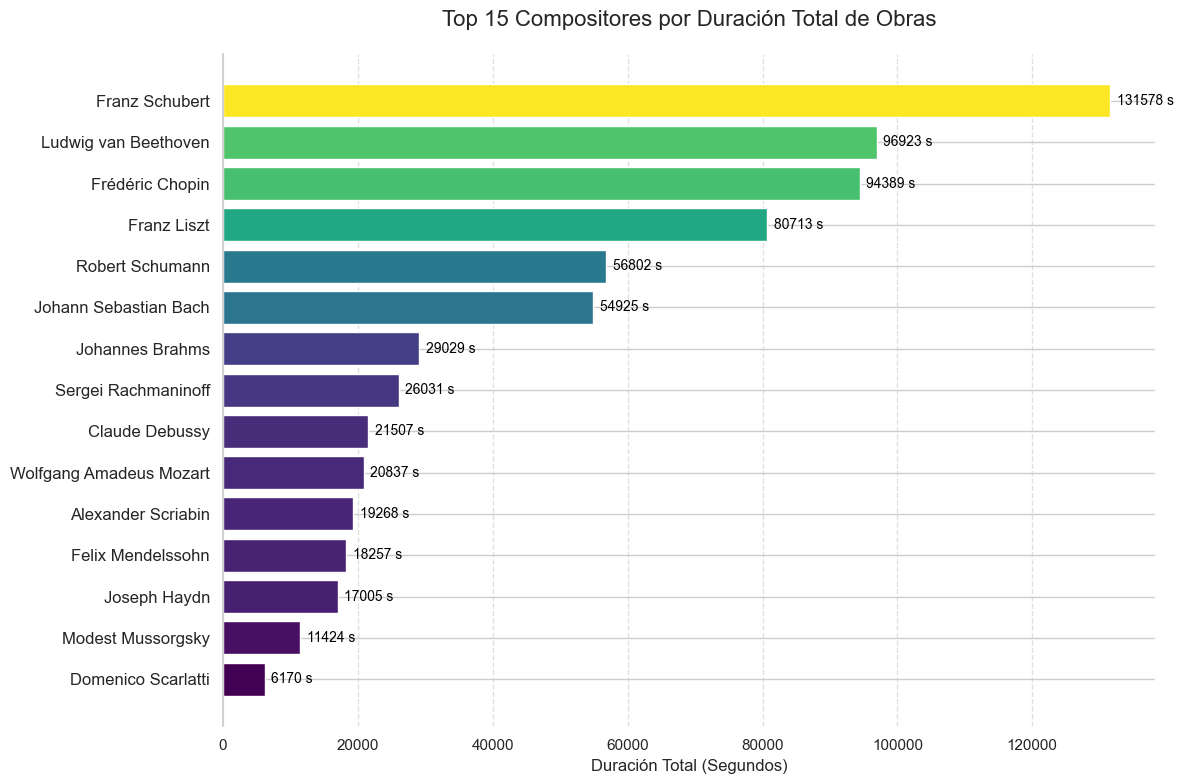

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm

# --- Configuración del Archivo ---
file_name = "duracion_individual_compositores_split.csv"

# 1. Cargar el DataFrame (ya ordenado)
try:
    df_new = pd.read_csv(file_name)
except FileNotFoundError:
    print(f"Error: No se encontró el archivo {file_name}. Asegúrate de que esté en el mismo directorio.")
    # Si no existe el archivo, se detiene la ejecución.
    exit()

# 2. Seleccionar los N Compositores principales para una visualización clara
N_top = 15
df_top = df_new.head(N_top).copy()

# 3. Crear el Gráfico de Barras Horizontal
plt.figure(figsize=(12, 8))

# Definir las posiciones Y para las barras
y_pos = np.arange(len(df_top))

# Mapear los colores a la duración usando el colormap 'viridis' (limpio y moderno)
cmap = cm.get_cmap('viridis')
# Normalizar los valores para mapearlos correctamente a la escala de colores
norm = plt.Normalize(df_top['Duración Total (Segundos)'].min(), df_top['Duración Total (Segundos)'].max())
colors = cmap(norm(df_top['Duración Total (Segundos)']))

# Crear las barras horizontales con plt.barh
plt.barh(
    y_pos, 
    df_top['Duración Total (Segundos)'], 
    color=colors
)

# 4. Configuración y Etiquetado
plt.title(f'Top {N_top} Compositores por Duración Total de Obras', fontsize=16, pad=20)
plt.xlabel('Duración Total (Segundos)', fontsize=12)

# Establecer los ticks y etiquetas Y con los nombres de los compositores
plt.yticks(y_pos, df_top['Compositor'], fontsize=12)

# Añadir etiquetas de valor numérico al final de cada barra para mayor precisión
for i, duration in enumerate(df_top['Duración Total (Segundos)']):
    plt.text(
        duration + 1000, 
        i, 
        f"{duration:.0f} s", 
        color='black',
        va='center',
        fontsize=10
    )

# Poner la barra más larga (mayor duración) en la parte superior
plt.gca().invert_yaxis() 
plt.grid(axis='x', linestyle='--', alpha=0.6) # Líneas de cuadrícula horizontal

# Limpiar bordes del gráfico para un look limpio
for spine in plt.gca().spines.values():
    if spine.spine_type != 'left': 
        spine.set_visible(False)
    
plt.tight_layout()

# 5. Guardar la figura
output_path = 'duracion_compositor_bar_chart_final.png'
plt.savefig(output_path)

print(f"\n✅ Gráfico generado y guardado como: {output_path}")

añadir columna de cada era del compositor, ver cual era es la que mas tiene este dataset 

In [43]:
import pandas as pd

# Cargar el archivo CSV subido
file_path = 'duracion_individual_compositores_split.csv'
df = pd.read_csv(file_path)

# Diccionario de eras musicales para los compositores más comunes en el dataset MAESTRO
# Se ha intentado cubrir la mayoría de los nombres visibles en los pasos anteriores.
composer_eras = {
    'Franz Schubert': 'Romanticismo',
    'Ludwig van Beethoven': 'Clasicismo/Romanticismo',
    'Frédéric Chopin': 'Romanticismo',
    'Franz Liszt': 'Romanticismo',
    'Robert Schumann': 'Romanticismo',
    'Johann Sebastian Bach': 'Barroco',
    'Johannes Brahms': 'Romanticismo',
    'Sergei Rachmaninoff': 'Romanticismo Tardío',
    'Claude Debussy': 'Impresionismo',
    'Wolfgang Amadeus Mozart': 'Clasicismo',
    'Alexander Scriabin': 'Romanticismo Tardío/Modernismo',
    'Felix Mendelssohn': 'Romanticismo',
    'Joseph Haydn': 'Clasicismo',
    'Modest Mussorgsky': 'Romanticismo',
    'Domenico Scarlatti': 'Barroco',
    'Pyotr Ilyich Tchaikovsky': 'Romanticismo',
    'César Franck': 'Romanticismo',
    'Ferruccio Busoni': 'Romanticismo Tardío',
    'Isaac Albéniz': 'Romanticismo (Nacionalismo)',
    'Muzio Clementi': 'Clasicismo',
    'Mikhail Pletnev': 'Contemporáneo',
    'Leoš Janáček': 'Siglo XX',
    'Nikolai Medtner': 'Romanticismo Tardío',
    'George Frideric Handel': 'Barroco',
    'Mily Balakirev': 'Romanticismo',
    'Alban Berg': 'Siglo XX (Segunda Escuela de Viena)',
    'George Enescu': 'Siglo XX',
    'Georges Bizet': 'Romanticismo',
    'Vladimir Horowitz': 'Siglo XX',
    'Carl Maria von Weber': 'Romanticismo',
    'Richard Wagner': 'Romanticismo',
    'Johann Christian Fischer': 'Clasicismo',
    'Mikhail Glinka': 'Romanticismo',
    'Camille Saint-Saëns': 'Romanticismo',
    'Charles Gounod': 'Romanticismo',
    'Henry Purcell': 'Barroco',
    'Egon Petri': 'Siglo XX',
    'Percy Grainger': 'Siglo XX',
    'Giuseppe Verdi': 'Romanticismo',
    'Johann Strauss': 'Romanticismo',
    'Alfred Grünfeld': 'Romanticismo',
    'Edvard Grieg': 'Romanticismo',
    'Fritz Kreisler': 'Siglo XX',
    'Moritz Moszkowski': 'Romanticismo',
    'Jean-Philippe Rameau': 'Barroco',
    'Leopold Godowsky': 'Romanticismo Tardío',
    'Niccolò Paganini': 'Romanticismo',
    'Orlando Gibbons': 'Renacimiento',
    'Antonio Soler': 'Barroco/Clasicismo',
    'Myra Hess': 'Siglo XX',
    'Vyacheslav Gryaznov': 'Contemporáneo',
    'Johann Pachelbel': 'Barroco',
    'György Cziffra': 'Siglo XX',
    'Nikolai Rimsky-Korsakov': 'Romanticismo'
}

# Función para aplicar el mapeo, devolviendo 'Desconocido' si no está en la lista
def get_era(composer):
    return composer_eras.get(composer, 'Desconocido')

# Crear la nueva columna 'Era'
df['Era'] = df['Compositor'].apply(get_era)

# Guardar el nuevo CSV
output_csv_path = 'duracion_compositores_con_era.csv'
df.to_csv(output_csv_path, index=False)

# Mostrar las primeras filas para verificar
print(df.head(15).to_string())

                 Compositor  Duración Total (Segundos)                             Era
0            Franz Schubert              131577.507449                    Romanticismo
1      Ludwig van Beethoven               96922.682897         Clasicismo/Romanticismo
2           Frédéric Chopin               94389.006934                    Romanticismo
3               Franz Liszt               80713.421904                    Romanticismo
4           Robert Schumann               56801.658204                    Romanticismo
5     Johann Sebastian Bach               54925.104609                         Barroco
6           Johannes Brahms               29028.633682                    Romanticismo
7       Sergei Rachmaninoff               26031.415856             Romanticismo Tardío
8            Claude Debussy               21507.282772                   Impresionismo
9   Wolfgang Amadeus Mozart               20837.123585                      Clasicismo
10       Alexander Scriabin               1

In [44]:
df.head()

,Compositor,Duración Total (Segundos),Era
0,Franz Schubert,131577.507449,Romanticismo
1,Ludwig van Beethoven,96922.682897,Clasicismo/Romanticismo
2,Frédéric Chopin,94389.006934,Romanticismo
3,Franz Liszt,80713.421904,Romanticismo
4,Robert Schumann,56801.658204,Romanticismo


In [45]:
df['Era'].unique()

array(['Romanticismo', 'Clasicismo/Romanticismo', 'Barroco',
       'Romanticismo Tardío', 'Impresionismo', 'Clasicismo',
       'Romanticismo Tardío/Modernismo', 'Romanticismo (Nacionalismo)',
       'Contemporáneo', 'Siglo XX', 'Siglo XX (Segunda Escuela de Viena)',
       'Renacimiento', 'Barroco/Clasicismo'], dtype=object)

In [46]:
len(df['Era'].unique())

13

añadir Era a maestro-v3.0.0.csv

🔄 Cargando maestro-v3.0.0.csv...
✅ Archivo guardado con columna Era: maestro_v3_with_era.csv

--- Conteo de Compositores por Era ---
Era
Romanticismo                           668
Barroco                                195
Clasicismo/Romanticismo                146
Clasicismo                              85
Romanticismo Tardío                     67
Impresionismo                           45
Romanticismo Tardío/Modernismo          35
Romanticismo (Nacionalismo)             24
Siglo XX                                 6
Siglo XX (Segunda Escuela de Viena)      3
Barroco/Clasicismo                       1
Renacimiento                             1
Name: count, dtype: int64

Total de Eras diferentes: 12

🎨 Generando gráfico...


C:\Users\franc\AppData\Local\Temp\ipykernel_6476\807659244.py:118: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('viridis')


✅ Gráfico guardado: duracion_compositor_bar_chart.png


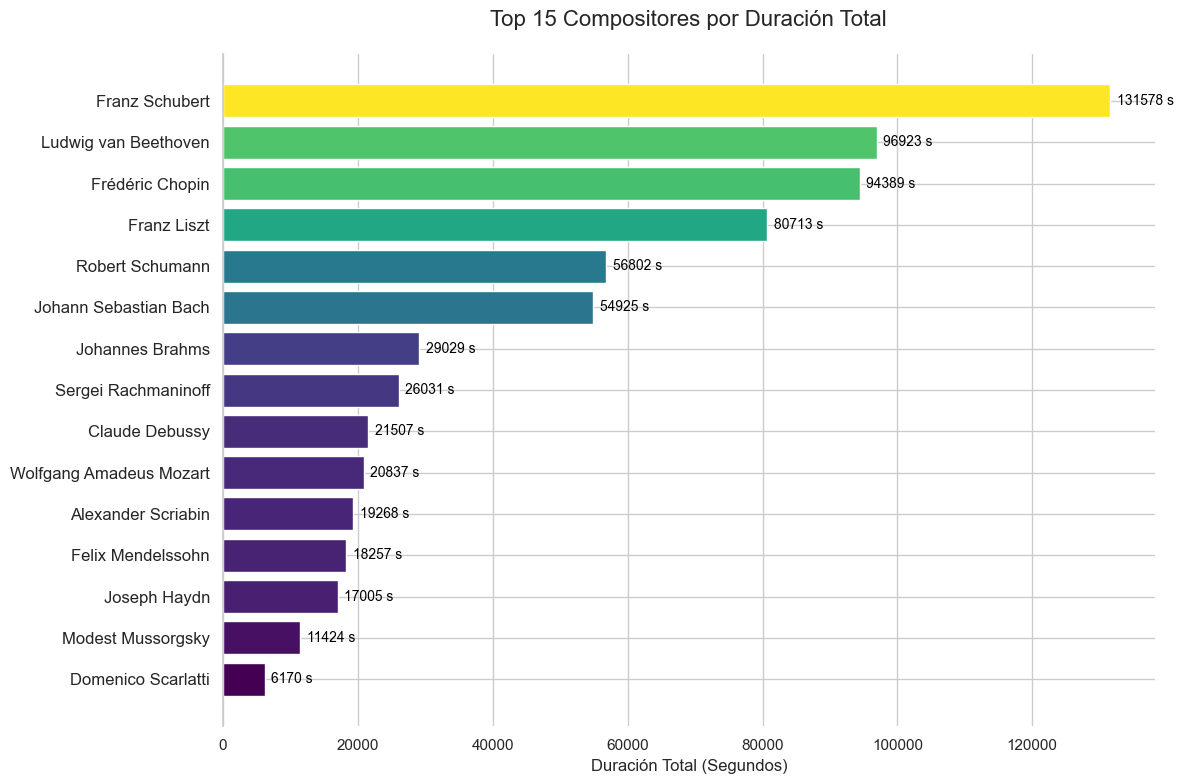

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
import os

def procesar_y_visualizar_todo():
    # --- CONFIGURACIÓN ---
    input_file = 'maestro-v3.0.0.csv'
    output_csv = 'maestro_v3_with_era.csv'
    output_img = 'duracion_compositor_bar_chart.png'

    print(f"🔄 Cargando {input_file}...")
    try:
        df = pd.read_csv(input_file)
    except FileNotFoundError:
        print(f"❌ Error: No se encontró '{input_file}'.")
        return

    # --- PASO 1: MAPEO DE ERAS (Tus 13 categorías exactas) ---
    era_mapping = {
        'Alban Berg': 'Siglo XX (Segunda Escuela de Viena)',
        'Alexander Scriabin': 'Romanticismo Tardío/Modernismo',
        'Antonio Soler': 'Barroco/Clasicismo',
        'Carl Maria von Weber': 'Romanticismo',
        'Charles Gounod / Franz Liszt': 'Romanticismo',
        'Claude Debussy': 'Impresionismo',
        'César Franck': 'Romanticismo',
        'Domenico Scarlatti': 'Barroco',
        'Edvard Grieg': 'Romanticismo (Nacionalismo)',
        'Felix Mendelssohn': 'Romanticismo',
        'Felix Mendelssohn / Sergei Rachmaninoff': 'Romanticismo',
        'Franz Liszt': 'Romanticismo',
        'Franz Liszt / Camille Saint-Saëns': 'Romanticismo',
        'Franz Liszt / Vladimir Horowitz': 'Romanticismo',
        'Franz Schubert': 'Romanticismo',
        'Franz Schubert / Franz Liszt': 'Romanticismo',
        'Franz Schubert / Leopold Godowsky': 'Romanticismo',
        'Fritz Kreisler / Sergei Rachmaninoff': 'Romanticismo Tardío',
        'Frédéric Chopin': 'Romanticismo',
        'George Enescu': 'Siglo XX',
        'George Frideric Handel': 'Barroco',
        'Georges Bizet / Ferruccio Busoni': 'Romanticismo',
        'Georges Bizet / Moritz Moszkowski': 'Romanticismo',
        'Georges Bizet / Vladimir Horowitz': 'Romanticismo',
        'Giuseppe Verdi / Franz Liszt': 'Romanticismo',
        'Henry Purcell': 'Barroco',
        'Isaac Albéniz': 'Romanticismo (Nacionalismo)',
        'Isaac Albéniz / Leopold Godowsky': 'Romanticismo (Nacionalismo)',
        'Jean-Philippe Rameau': 'Barroco',
        'Johann Christian Fischer / Wolfgang Amadeus Mozart': 'Clasicismo',
        'Johann Pachelbel': 'Barroco',
        'Johann Sebastian Bach': 'Barroco',
        'Johann Sebastian Bach / Egon Petri': 'Barroco',
        'Johann Sebastian Bach / Ferruccio Busoni': 'Barroco',
        'Johann Sebastian Bach / Franz Liszt': 'Barroco',
        'Johann Sebastian Bach / Myra Hess': 'Barroco',
        'Johann Strauss / Alfred Grünfeld': 'Romanticismo',
        'Johannes Brahms': 'Romanticismo',
        'Joseph Haydn': 'Clasicismo',
        'Leoš Janáček': 'Siglo XX',
        'Ludwig van Beethoven': 'Clasicismo/Romanticismo',
        'Mikhail Glinka / Mily Balakirev': 'Romanticismo (Nacionalismo)',
        'Mily Balakirev': 'Romanticismo (Nacionalismo)',
        'Modest Mussorgsky': 'Romanticismo (Nacionalismo)',
        'Muzio Clementi': 'Clasicismo',
        'Niccolò Paganini / Franz Liszt': 'Romanticismo',
        'Nikolai Medtner': 'Romanticismo Tardío',
        'Nikolai Rimsky-Korsakov / Sergei Rachmaninoff': 'Romanticismo (Nacionalismo)',
        'Orlando Gibbons': 'Renacimiento',
        'Percy Grainger': 'Siglo XX',
        'Pyotr Ilyich Tchaikovsky': 'Romanticismo',
        'Pyotr Ilyich Tchaikovsky / Mikhail Pletnev': 'Romanticismo',
        'Pyotr Ilyich Tchaikovsky / Sergei Rachmaninoff': 'Romanticismo',
        'Richard Wagner / Franz Liszt': 'Romanticismo',
        'Robert Schumann': 'Romanticismo',
        'Robert Schumann / Franz Liszt': 'Romanticismo',
        'Sergei Rachmaninoff': 'Romanticismo Tardío',
        'Sergei Rachmaninoff / György Cziffra': 'Romanticismo Tardío',
        'Sergei Rachmaninoff / Vyacheslav Gryaznov': 'Romanticismo Tardío',
        'Wolfgang Amadeus Mozart': 'Clasicismo'
    }

    # Aplicar el mapeo
    df['Era'] = df['canonical_composer'].map(era_mapping)
    
    # Guardar el nuevo CSV
    df.to_csv(output_csv, index=False)
    print(f"✅ Archivo guardado con columna Era: {output_csv}")

    # --- PASO 2: VERIFICACIÓN DE CLASES ---
    print("\n--- Conteo de Compositores por Era ---")
    print(df['Era'].value_counts())
    print(f"\nTotal de Eras diferentes: {len(df['Era'].unique())}")

    # --- PASO 3: PREPARAR DATOS PARA GRÁFICO (Separar Compositores) ---
    # Limpiar duraciones
    df['duration'] = pd.to_numeric(df['duration'], errors='coerce')
    df.dropna(subset=['duration'], inplace=True)
    
    # Separar compositores conjuntos (split '/')
    df_split = df.copy()
    df_split['canonical_composer'] = df_split['canonical_composer'].str.split('/')
    df_exploded = df_split.explode('canonical_composer')
    df_exploded['canonical_composer'] = df_exploded['canonical_composer'].str.strip()
    
    # Calcular duración total
    total_duration = df_exploded.groupby('canonical_composer')['duration'].sum().reset_index()
    total_duration.columns = ['Compositor', 'Duración Total (Segundos)']
    df_top = total_duration.sort_values(by='Duración Total (Segundos)', ascending=False).head(15)

    # --- PASO 4: GENERAR GRÁFICO DE BARRAS HORIZONTAL ---
    print("\n🎨 Generando gráfico...")
    plt.figure(figsize=(12, 8))
    y_pos = np.arange(len(df_top))
    
    # Colores elegantes (viridis)
    cmap = cm.get_cmap('viridis')
    norm = plt.Normalize(df_top['Duración Total (Segundos)'].min(), df_top['Duración Total (Segundos)'].max())
    colors = cmap(norm(df_top['Duración Total (Segundos)']))

    # Barras
    plt.barh(y_pos, df_top['Duración Total (Segundos)'], color=colors)

    # Etiquetas y Estilo
    plt.title(f'Top 15 Compositores por Duración Total', fontsize=16, pad=20)
    plt.xlabel('Duración Total (Segundos)', fontsize=12)
    plt.yticks(y_pos, df_top['Compositor'], fontsize=12)
    
    # Poner etiquetas de valor
    for i, duration in enumerate(df_top['Duración Total (Segundos)']):
        plt.text(duration + 1000, i, f"{duration:.0f} s", color='black', va='center', fontsize=10)

    plt.gca().invert_yaxis() # Mayor arriba
    
    # Limpiar bordes
    for spine in plt.gca().spines.values():
        if spine.spine_type != 'left': 
            spine.set_visible(False)
    
    plt.tight_layout()
    plt.savefig(output_img)
    print(f"✅ Gráfico guardado: {output_img}")

if __name__ == "__main__":
    procesar_y_visualizar_todo()

In [48]:
df_new = pd.read_csv("maestro_v3_with_era.csv")
df_new.head()

,canonical_composer,canonical_title,split,year,midi_filename,audio_filename,duration,Era
0,Alban Berg,Sonata Op. 1,train,2018,2018/MIDI-Unprocessed_Chamber3_MID--AUDIO_10_R...,2018/MIDI-Unprocessed_Chamber3_MID--AUDIO_10_R...,698.661160,Siglo XX (Segunda Escuela de Viena)
1,Alban Berg,Sonata Op. 1,train,2008,2008/MIDI-Unprocessed_03_R2_2008_01-03_ORIG_MI...,2008/MIDI-Unprocessed_03_R2_2008_01-03_ORIG_MI...,759.518471,Siglo XX (Segunda Escuela de Viena)
2,Alban Berg,Sonata Op. 1,train,2017,2017/MIDI-Unprocessed_066_PIANO066_MID--AUDIO-...,2017/MIDI-Unprocessed_066_PIANO066_MID--AUDIO-...,464.649433,Siglo XX (Segunda Escuela de Viena)
3,Alexander Scriabin,"24 Preludes Op. 11, No. 13-24",train,2004,2004/MIDI-Unprocessed_XP_21_R1_2004_01_ORIG_MI...,2004/MIDI-Unprocessed_XP_21_R1_2004_01_ORIG_MI...,872.640588,Romanticismo Tardío/Modernismo
4,Alexander Scriabin,"3 Etudes, Op. 65",validation,2006,2006/MIDI-Unprocessed_17_R1_2006_01-06_ORIG_MI...,2006/MIDI-Unprocessed_17_R1_2006_01-06_ORIG_MI...,397.857508,Romanticismo Tardío/Modernismo


In [49]:
df_new['Era'].unique()

array(['Siglo XX (Segunda Escuela de Viena)',
       'Romanticismo Tardío/Modernismo', 'Barroco/Clasicismo',
       'Romanticismo', 'Impresionismo', 'Barroco',
       'Romanticismo (Nacionalismo)', 'Romanticismo Tardío', 'Siglo XX',
       'Clasicismo', 'Clasicismo/Romanticismo', 'Renacimiento'],
      dtype=object)

In [50]:

df_new['Era'].value_counts()


Era
Romanticismo                           668
Barroco                                195
Clasicismo/Romanticismo                146
Clasicismo                              85
Romanticismo Tardío                     67
Impresionismo                           45
Romanticismo Tardío/Modernismo          35
Romanticismo (Nacionalismo)             24
Siglo XX                                 6
Siglo XX (Segunda Escuela de Viena)      3
Barroco/Clasicismo                       1
Renacimiento                             1
Name: count, dtype: int64

ver que obra , si impromptu , chorales , etc 